## 컨볼루션 신경망 
해당 실습은 CNN을 활용한 이진분류 예제입니다.

In [77]:
!wget --no-check-certificate \
https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \ -0 /content/cats_and_dogs_filtered.zip

--2022-08-26 03:53:12--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.62.128, 172.253.115.128, 172.253.122.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.62.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip.1’

cats_and_dogs_filte 100%[===================>]  65.43M   241MB/s    in 0.3s    

2022-08-26 03:53:13 (241 MB/s) - ‘cats_and_dogs_filtered.zip.1’ saved [68606236/68606236]

--2022-08-26 03:53:13--  http://%20-0/
Resolving  -0 ( -0)... failed: Name or service not known.
wget: unable to resolve host address ‘ -0’
/content/cats_and_dogs_filtered.zip: Scheme missing.
FINISHED --2022-08-26 03:53:13--
Total wall clock time: 0.4s
Downloaded: 1 files, 65M in 0.3s (241 MB/s)


In [78]:
import os
import zipfile

In [79]:
local_zip = '/content/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')

In [80]:
zip_ref.extractall('/content')
zip_ref.close()

In [81]:
base_dir = '/content/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train') # 경로생성
validation_dir = os.path.join(base_dir, 'validation')
print(train_dir)
print(validation_dir)

/content/cats_and_dogs_filtered/train
/content/cats_and_dogs_filtered/validation


In [82]:
# 훈련에 사용되는 개, 고양이 디렉토리 경로
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
print(train_cats_dir)
print(train_dogs_dir)

/content/cats_and_dogs_filtered/train/cats
/content/cats_and_dogs_filtered/train/dogs


In [83]:
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
print(validation_cats_dir)
print(validation_dogs_dir)

/content/cats_and_dogs_filtered/validation/cats
/content/cats_and_dogs_filtered/validation/dogs


In [84]:
train_cats_fnames = os.listdir(train_cats_dir)
train_dogs_fnames = os.listdir(train_dogs_dir)

In [85]:
print(train_cats_fnames[:5])
print(train_dogs_fnames[:5])

['cat.417.jpg', 'cat.198.jpg', 'cat.763.jpg', 'cat.117.jpg', 'cat.77.jpg']
['dog.676.jpg', 'dog.508.jpg', 'dog.347.jpg', 'dog.720.jpg', 'dog.211.jpg']


In [86]:
print('학습용 고양이 사진 : ', len(train_cats_fnames))
print('학습용 강아지 사진 : ', len(train_dogs_fnames))

학습용 고양이 사진 :  1000
학습용 강아지 사진 :  1000


In [87]:
validation_cats_fnames = os.listdir(validation_cats_dir)
validation_dogs_fnames = os.listdir(validation_dogs_dir)

print(validation_cats_fnames[:5])
print(validation_dogs_fnames[:5])

['cat.2392.jpg', 'cat.2261.jpg', 'cat.2273.jpg', 'cat.2133.jpg', 'cat.2124.jpg']
['dog.2181.jpg', 'dog.2461.jpg', 'dog.2215.jpg', 'dog.2387.jpg', 'dog.2047.jpg']


In [88]:
print('검증용 고양이 사진 : ', len(validation_cats_fnames))
print('검증용 강아지 사진 : ', len(validation_dogs_fnames))

검증용 고양이 사진 :  500
검증용 강아지 사진 :  500


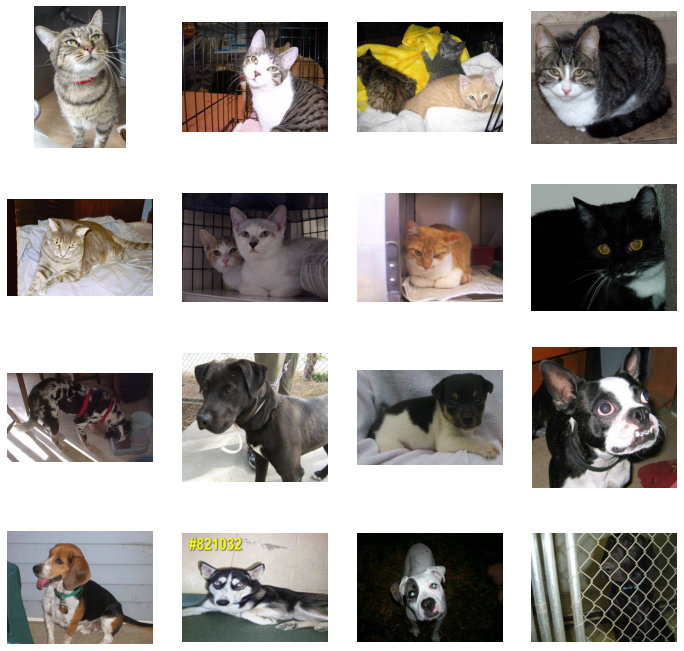

In [89]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

nrows, ncols = 4,4
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols*3, nrows*3)

pic_index+=8
next_cat_pix = [os.path.join(train_cats_dir, fname) for fname in \
                train_cats_fnames[ pic_index-8:pic_index]]
next_dog_pix = [os.path.join(train_dogs_dir, fname) for fname in \
                train_dogs_fnames[ pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)
plt.show()

In [90]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# train_datagen = ImageDataGenerator(rescale=1./255)
# validation_datagen = ImageDataGenerator(rescale=1./255)

In [91]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#---------------------------- 이미지 어그멘테이션
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  horizontal_flip = True,
                                   vertical_flip = True,
                                   brightness_range = [0.5, 1.5],
                                   zoom_range = 0.2,
                                   width_shift_range = 0.1,
                                   height_shift_range = 0.1,
                                   rotation_range = 30,
                                   fill_mode = 'nearest')
# fill_mode에는 'constant', 'nearest', 'reflect', 'wrap'
validation_datagen = ImageDataGenerator(rescale = 1./255)

In [92]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 32,
                                                    target_size=(150,150),
                                                    classes = ['dogs', 'cats'],
                                                    color_mode = 'rgb',
                                                    class_mode = 'binary')
validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                    batch_size = 32,
                                                    target_size=(150,150),
                                                    classes = ['dogs', 'cats'],
                                                    color_mode = 'rgb',
                                                    class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [93]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2,l1,l1_l2

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same',
                 activation = 'relu', input_shape = (150, 150, 3)))
model.add(MaxPool2D(pool_size = (2,2), strides = 2, padding = 'same'))


model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same',
                 activation = 'relu')) 
model.add(MaxPool2D(pool_size = (2,2), strides = 2, padding = 'same'))

model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same',
                 activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2), strides = 2, padding = 'same'))

model.add(Dropout(0.3)) # 드롭아웃 추가
model.add(Flatten())
model.add(Dense(256, activation = 'relu')) 
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = Adam(1e-4),
              loss = 'binary_crossentropy',
              metrics = ['acc'])

In [94]:
batch_size = 32
def get_step(train_len, batch_size):
  if(train_len % batch_size > 0):
    return train_len // batch_size + 1
  else:
    return train_len // batch_size

history = model.fit(train_generator,
                    epochs = 30,
                    validation_data = validation_generator)

Epoch 1/30
63/63 [==============================] - 25s 387ms/step - loss: 0.6924 - acc: 0.5330 - val_loss: 0.6686 - val_acc: 0.6300
Epoch 2/30
63/63 [==============================] - 19s 297ms/step - loss: 0.6682 - acc: 0.5835 - val_loss: 0.6520 - val_acc: 0.5740
Epoch 3/30
63/63 [==============================] - 19s 299ms/step - loss: 0.6431 - acc: 0.6310 - val_loss: 0.6151 - val_acc: 0.6450
Epoch 4/30
63/63 [==============================] - 19s 297ms/step - loss: 0.6282 - acc: 0.6520 - val_loss: 0.6135 - val_acc: 0.6710
Epoch 5/30
63/63 [==============================] - 21s 337ms/step - loss: 0.6137 - acc: 0.6595 - val_loss: 0.5949 - val_acc: 0.6780
Epoch 6/30
63/63 [==============================] - 19s 300ms/step - loss: 0.5998 - acc: 0.6865 - val_loss: 0.6079 - val_acc: 0.6600
Epoch 7/30
63/63 [==============================] - 19s 297ms/step - loss: 0.6008 - acc: 0.6700 - val_loss: 0.5828 - val_acc: 0.6960
Epoch 8/30
63/63 [==============================] - 19s 297ms/step - 

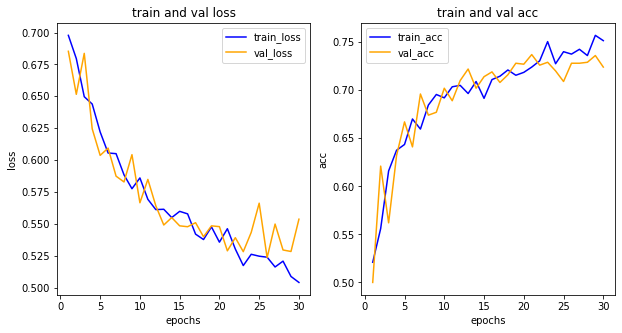

In [76]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss)+1)
fig = plt.figure(figsize = (10,5))
# 학습 및 검증 손실 그리기

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss , color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 학습 및 검증 정확도 그리기

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

In [95]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt

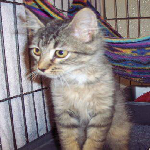

In [97]:
img = image.load_img('/content/cats_and_dogs_filtered/train/cats/cat.2.jpg',
                     target_size=(150,150))
img

In [98]:
x = image.img_to_array(img)
print('전', x.shape)
images = np.expand_dims(x,axis=0) # 샘플을 넣기위해 차원을 확장해줘야함
print('후',images.shape)

전 (150, 150, 3)
후 (1, 150, 150, 3)


In [100]:
classes = model.predict(images, batch_size=10)
classes

array([[1.]], dtype=float32)

In [108]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt

def pred(fname):
  img=image.load_img(fname, target_size=(150,150))
  plt.imshow(img)

  x=image.img_to_array(img)
  images = np.expand_dims(x, axis = 0)

  classes = model.predict(images, batch_size = 10)
  print(classes[0])

  if classes[0]>0:
    print(fname.split('/')[-1] + '사진은 강아지 입니다.')
  else:
    print(fname.split('/')[-1] + '사진은 고양이 입니다.')



In [ ]:
files.upload()

[5.550554e-30]
555.jpg사진은 강아지 입니다.


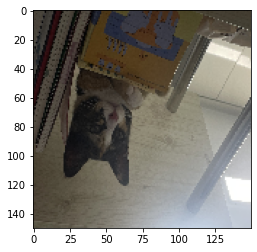

In [109]:
pred('/content/555.jpg')

[0.]
777.jpg사진은 고양이 입니다.


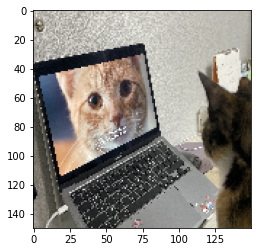

In [110]:
pred('/content/777.jpg')